In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers_clustering.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Basic Checks

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Insights
- There are no missing values 
- Avg age of customers visiting mall is 38 to 39.
- Min age of customer is 18
- Max age of customer visting mall is 70.
- Min smount spend by a customer in mall is only 1 where max amount spend by customer is 99.

## Domain Analysis
1. CustomerID - The unique ID of each customer visiting mall.
2. Age - Age of Customers.
3. Annual income - How much each customer earn annually in(k).
4. Spending Score - How much each cutomer is spending on products.

## EDA

In [11]:
data.head(1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


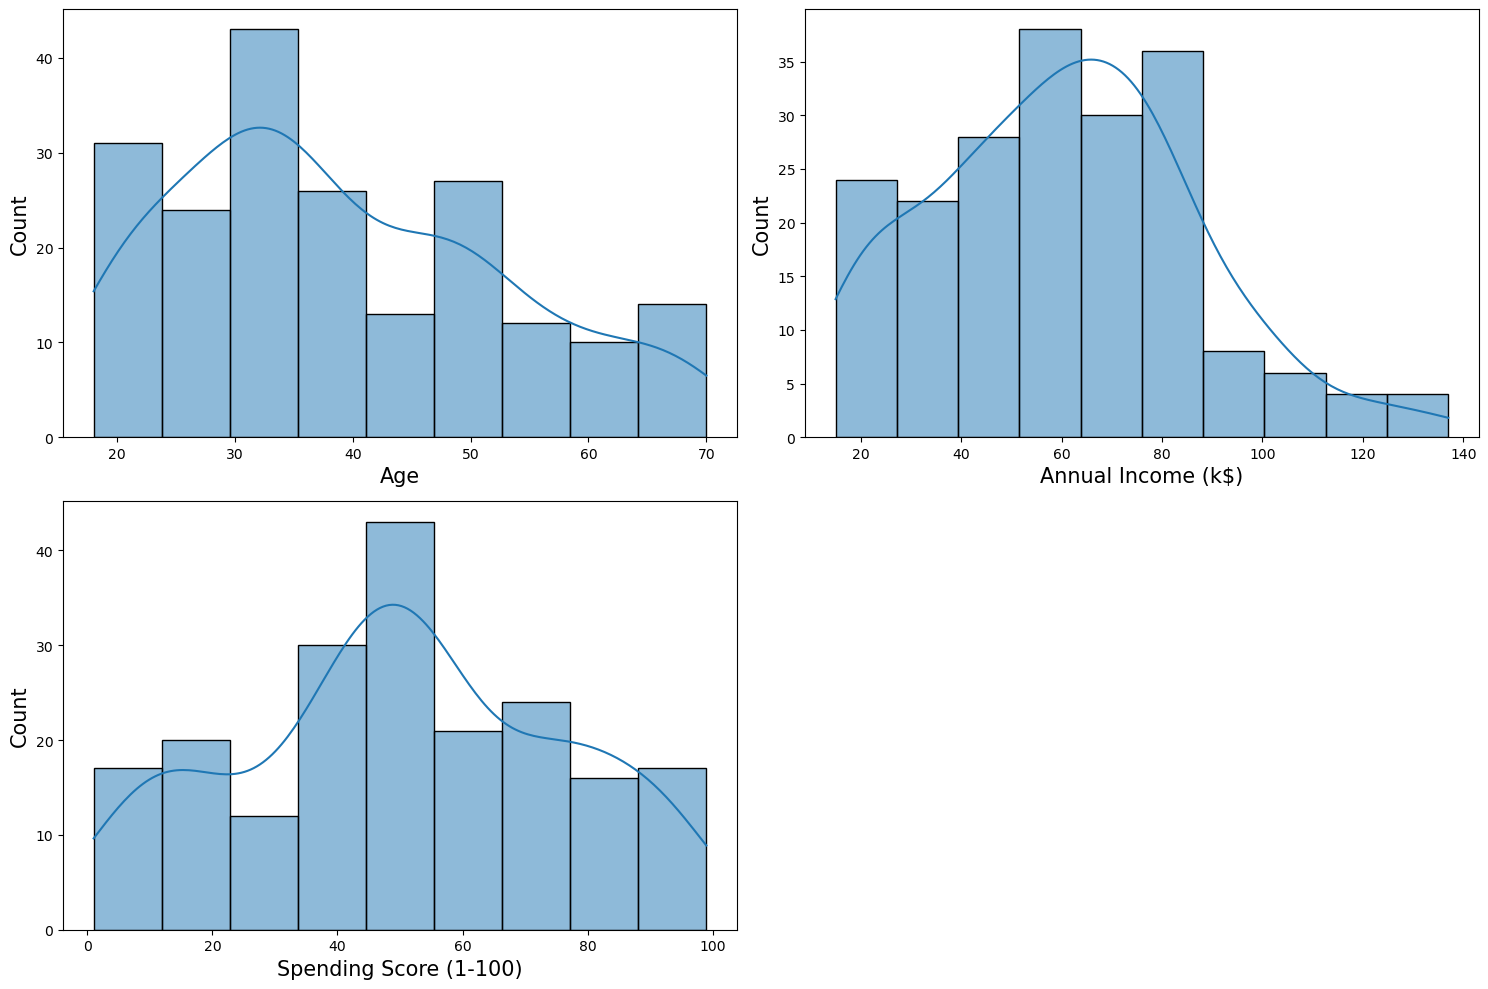

In [12]:
#Univariate Analysis

plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in data.drop(['CustomerID','Genre'],axis=1):
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

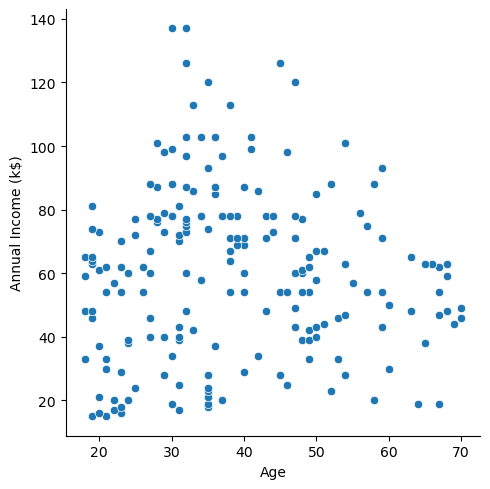

In [19]:
# Bivariate Analysis
# Relationship between Annual Income (k$) and age

sns.relplot(x='Age',y='Annual Income (k$)',data=data)
plt.show()

As we can see there is no relationship between these two

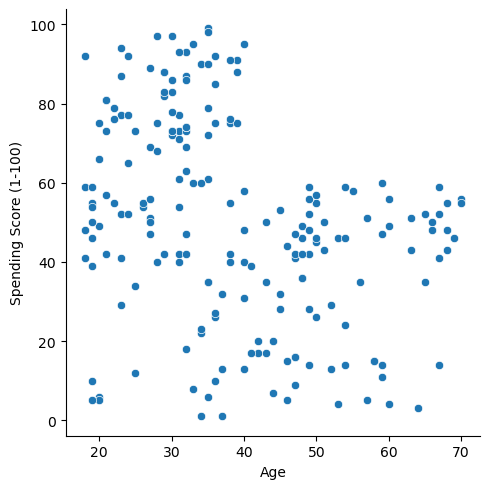

In [20]:
# Relationship between Age 
sns.relplot(x='Age',y='Spending Score (1-100)',data=data)
plt.show()

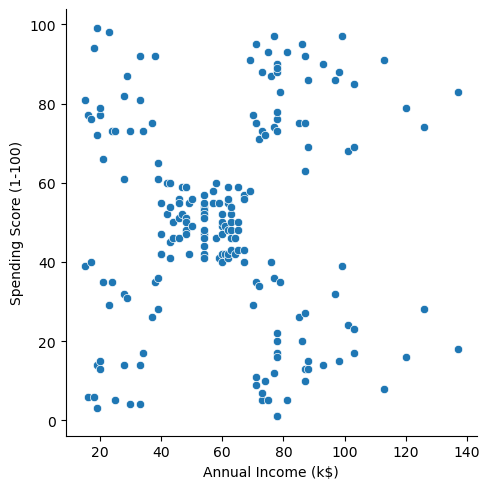

In [22]:
# Relationship between Annual Income (k$) and Spending Score (1-100)
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.show()

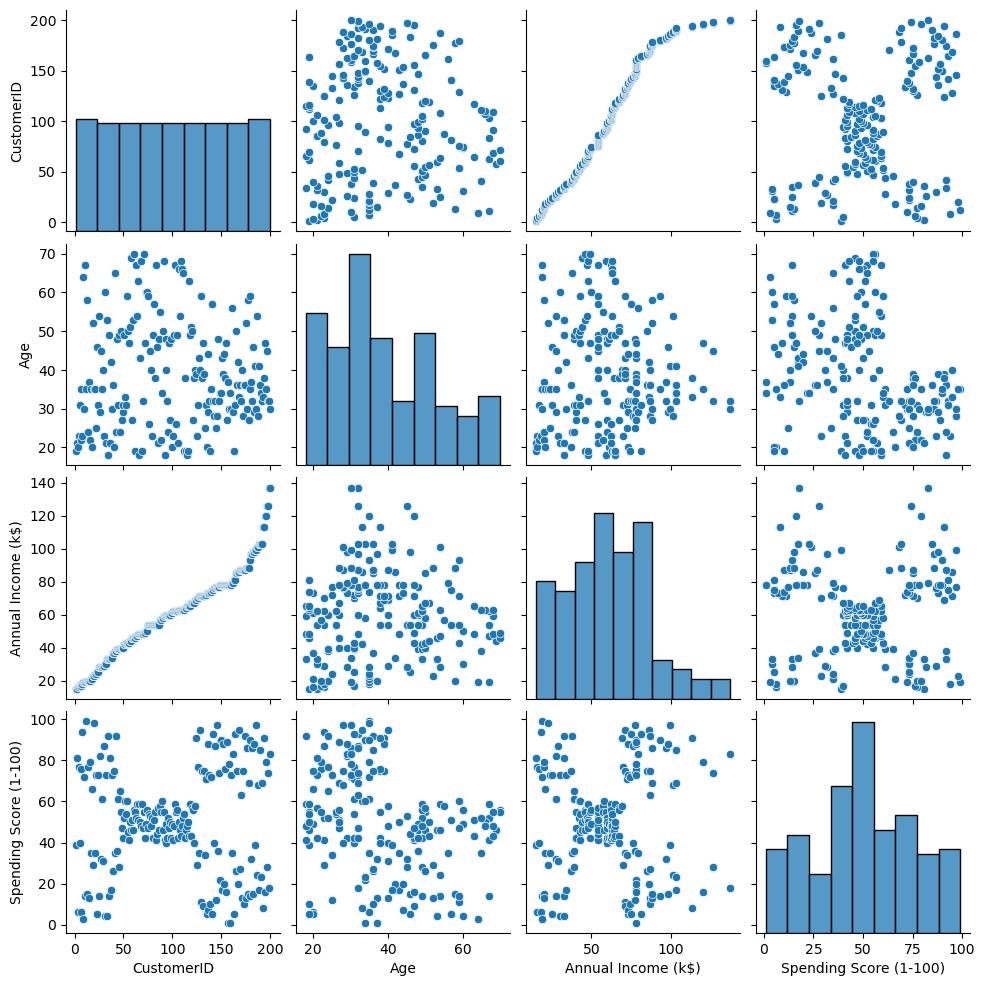

In [24]:
# Multivariate Analysis

sns.pairplot(data=data)
plt.show()

## Data Preprocessing

In [29]:
# Checking null values
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
# Checking duplicate values
data.duplicated().sum()

0

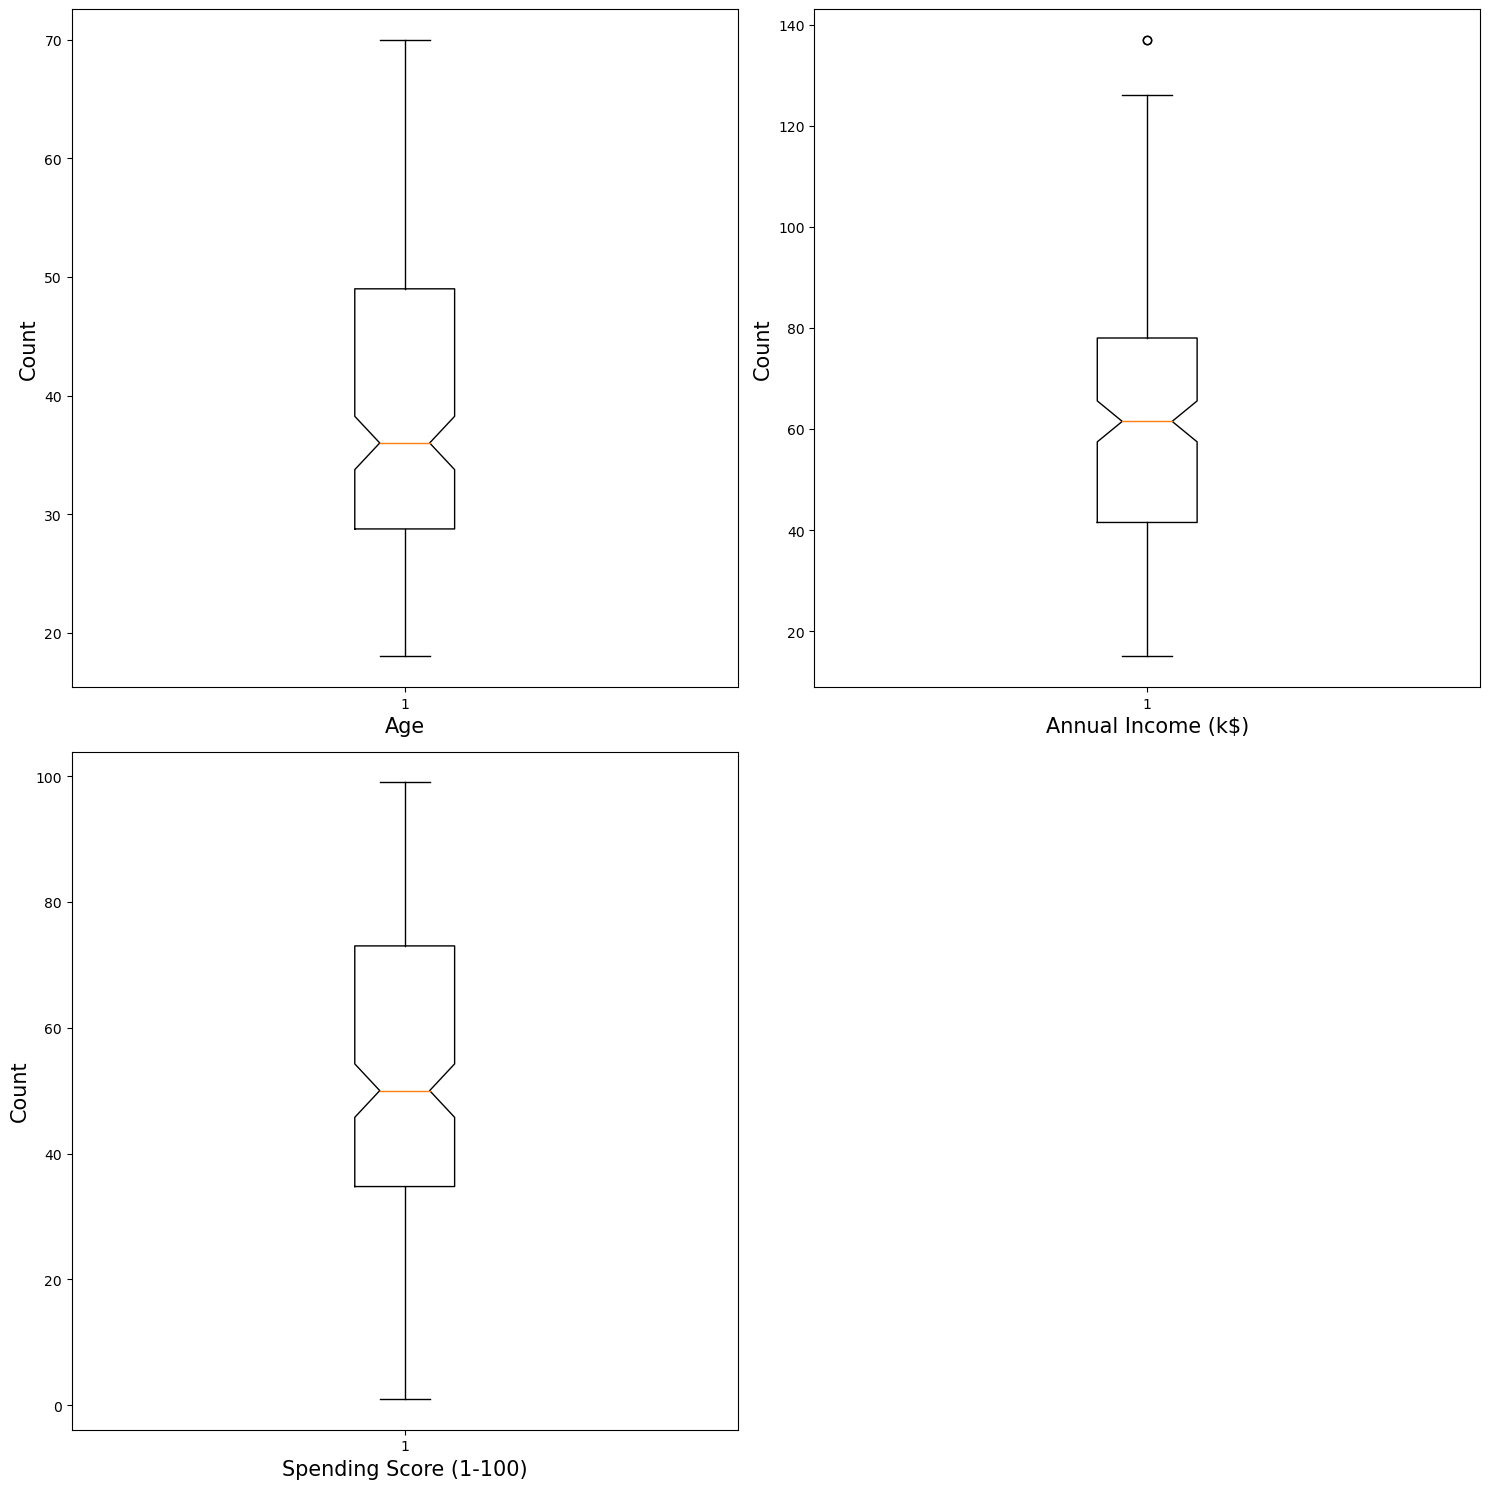

In [32]:
# Checking and handling outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.drop(['CustomerID','Genre'],axis=1):
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        plt.boxplot(data[column],plotnumber)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
    
plt.tight_layout()
    

In [33]:
data.head(1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [36]:
# A s we can see there is one outlier in Annual income

q1=data['Annual Income (k$)'].quantile(0.25)
q3=data['Annual Income (k$)'].quantile(0.75)
print(q1)
print(q3)

41.5
78.0


In [38]:
IQR = q3-q1
print(IQR)

36.5


In [39]:
min_ = q1-1.5*IQR
max_ = q3+1.5*IQR
print(min_)
print(max_)

-13.25
132.75


In [40]:
data.loc[data['Annual Income (k$)']>max_]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83
